In [9]:
import pandas as pd

data = pd.read_csv('/Users/viktoriasazonova/Milk/output_file.csv')
data['TARGET'] = data['NAME'].apply(lambda x: 0 if x == 'milk' else 1)

print(data.head(2))

X = data.drop(columns=['NAME', 'CONCENTRATION', 'TARGET'])
y = data['TARGET']

print(X.shape, y.shape)

           NAME  CONCENTRATION      -0.8    -0.795     -0.79   -0.785  \
0  streptomycin   1.000000e-05 -0.000089 -0.000060 -0.000048 -0.00004   
1  streptomycin   1.000000e-07 -0.000087 -0.000084 -0.000082 -0.00008   

      -0.78    -0.775     -0.77    -0.765  ...  -0.755.1   -0.76.1  -0.765.1  \
0 -0.000039 -0.000035 -0.000032 -0.000029  ... -0.000037 -0.000037 -0.000038   
1 -0.000077 -0.000075 -0.000074 -0.000072  ... -0.000069 -0.000070 -0.000070   

    -0.77.1  -0.775.1   -0.78.1  -0.785.1   -0.79.1  -0.795.1  TARGET  
0 -0.000038 -0.000038 -0.000038 -0.000038 -0.000038 -0.000038       1  
1 -0.000070 -0.000070 -0.000071 -0.000071 -0.000071 -0.000072       1  

[2 rows x 1043 columns]
(1377, 1040) (1377,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки X:", X_train.shape)
print("Размер тестовой выборки X:", X_test.shape)
print("Размер целевой переменной обучающей выборки y:", y_train.shape)
print("Размер целевой переменной тестовой выборки y:", y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Размер обучающей выборки X: (1101, 1040)
Размер тестовой выборки X: (276, 1040)
Размер целевой переменной обучающей выборки y: (1101,)
Размер целевой переменной тестовой выборки y: (276,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder

import scikitplot as skplt

In [16]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Оценка модели Логистической Регрессии: \nТочность: {accuracy_logreg:.4f} \nПолнота (Recall): {recall_logreg:.4f} \nF1-мера: {f1_logreg:.4f} \n")


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Оценка модели k-NN: \nТочность: {accuracy_knn:.4f} \nПолнота (Recall): {recall_knn:.4f} \nF1-мера: {f1_knn:.4f} \n")


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Оценка модели случайный лес: \nТочность = {accuracy_rf:.4f} \nПолнота = {recall_rf:.4f} \nF1-мера = {f1_rf:.4f} \n")


svm_model = SVC(max_iter=2000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Оценка модели SVM: \nТочность = {accuracy_svm:.4f} \nПолнота = {recall_svm:.4f} \nF1-мера = {f1_svm:.4f} \n")

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Оценка модели градиентный бустинг: \nТочность = {accuracy_gb:.4f} \nПолнота = {recall_gb:.4f} \nF1-мера = {f1_gb:.4f}")

Оценка модели Логистической Регрессии: 
Точность: 0.7935 
Полнота (Recall): 1.0000 
F1-мера: 0.8848 

Оценка модели k-NN: 
Точность: 0.9239 
Полнота (Recall): 0.9680 
F1-мера: 0.9528 

Оценка модели случайный лес: 
Точность = 0.9674 
Полнота = 0.9817 
F1-мера = 0.9795 

Оценка модели SVM: 
Точность = 0.8551 
Полнота = 0.9863 
F1-мера = 0.9153 

Оценка модели градиентный бустинг: 
Точность = 0.9601 
Полнота = 0.9863 
F1-мера = 0.9752


Размер X_test_scaled: (276, 1040)
Размер y_test: (276,)
Размер y_pred_gb: 276


/Users/viktoriasazonova/Milk/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


<Figure size 600x500 with 0 Axes>

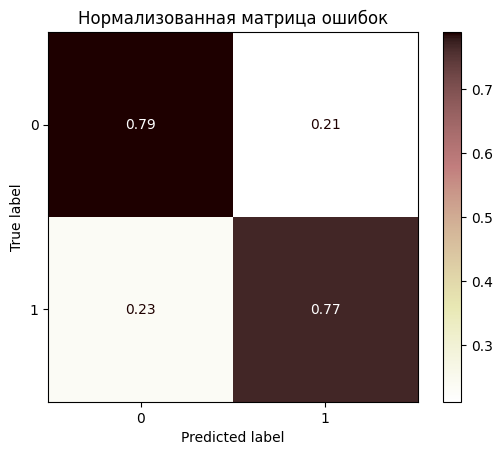

In [24]:
y_pred_gb = gb_model.predict(X_test_scaled)

print(f"Размер X_test_scaled: {X_test_scaled.shape}")
print(f"Размер y_test: {y_test.shape}")
print(f"Размер y_pred_gb: {len(y_pred_gb)}")

cm_gb = confusion_matrix(y_test, y_pred_gb, normalize='true')

cm_normalized = cm_gb.astype('float') / cm_gb.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb_model.classes_)
disp.plot(cmap='pink_r', values_format=".2f")

plt.title("Нормализованная матрица ошибок")
plt.show()

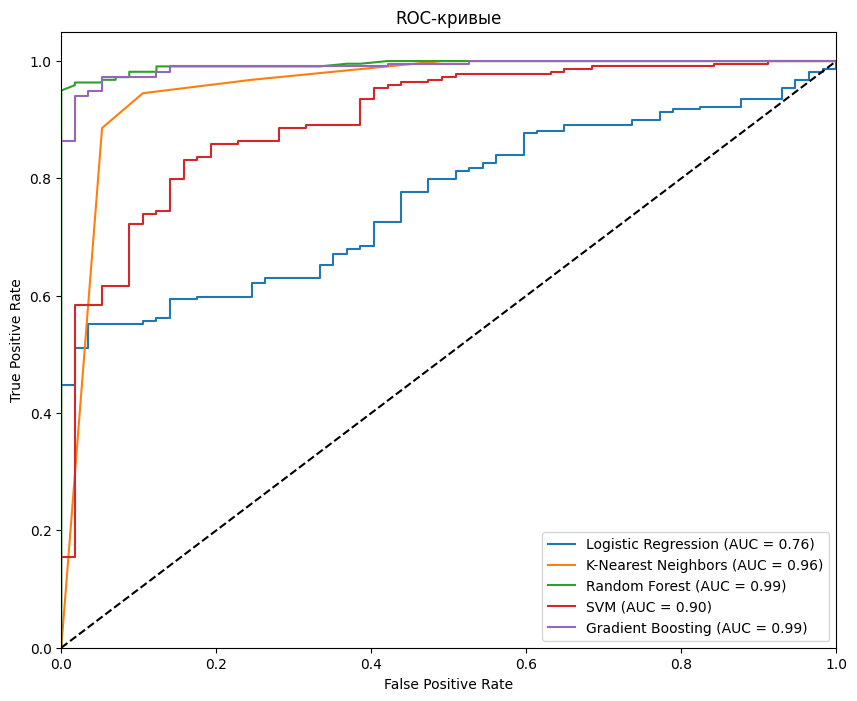

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc='lower right')
plt.show()

In [26]:
X = data.iloc[:, 2:].values
y = data["NAME"].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Размер X_train:", X_train_scaled.shape)
print("Размер X_test:", X_test_scaled.shape)
print("Классы после кодировки:", label_encoder.classes_)

Размер X_train: (1101, 1041)
Размер X_test: (276, 1041)
Классы после кодировки: ['cefazoline' 'ceftiofur' 'milk' 'penicillin' 'streptomycin'
 'tetracycline']


In [36]:
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
        
    y_pred = model.predict(X_test_scaled)
        
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results[name] = [acc, recall, f1]

    #print(f"\n{name}:")
    #print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results, index=["Accuracy", "Recall", "F1-score"])
print("\nСравнение моделей:")
print(results)



Сравнение моделей:
{'Логистическая регрессия': [0.9130434782608695, 0.9130434782608695, 0.9129039745552548], 'k-NN': [0.8695652173913043, 0.8695652173913043, 0.870204515012666], 'Random Forest': [0.9130434782608695, 0.9130434782608695, 0.9129066798365814], 'SVM': [0.8840579710144928, 0.8840579710144928, 0.8820534505228546], 'Gradient Boosting': [0.9456521739130435, 0.9456521739130435, 0.9454986562154736]}


TypeError: '<' not supported between instances of 'str' and 'int'

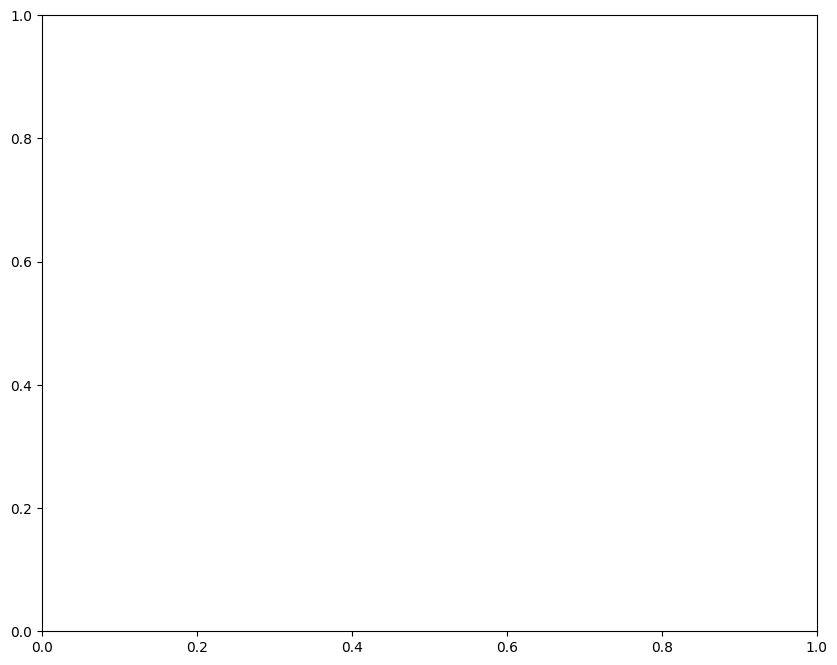

In [35]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred_gb, normalize=True, figsize=(10, 8), cmap="Reds",
    title='Нормализованная матрица ошибок — Gradient Boosting', labels=label_encoder.classes_) #labels=np.arange(len(label_encoder.classes_)
plt.tight_layout()
plt.show()